## Importing imp Libraries

In [7]:
import pandas as pd
import numpy as np
import nltk

## Loading Data 

**Amazon Fine Food Reviews**

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Dataset link : https://www.kaggle.com/snap/amazon-fine-food-reviews

In [8]:
review_data = pd.read_csv('Reviews.csv',nrows=10000)

### Take look at first 5 rows of data

In [9]:
review_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Dimension of data


In [10]:
review_data.shape

(10000, 10)

### Data :Columns ,datatype information


In [11]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


### Take only Text & Score columns and update review_data 


In [12]:
review_data = review_data[['Text','Score']]

In [13]:
review_data

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5
...,...,...
9995,we switched from the advance similac to the or...,1
9996,"Like the bad reviews say, the organic formula ...",5
9997,I wanted to solely breastfeed but was unable t...,5
9998,i love the fact that i can get this delieved t...,5


### Store Text column in features variable & Score column in target variable


In [14]:
features = review_data['Text']
target = review_data['Score']

In [15]:
i = 1
print("Score :" ,target[i])
print(features[i])

Score : 1
Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


### Plot a graph to know frequency count of Score column

In [16]:
review_data['Score'].value_counts()

5    6183
4    1433
1     932
3     862
2     590
Name: Score, dtype: int64

/Users/e106922/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

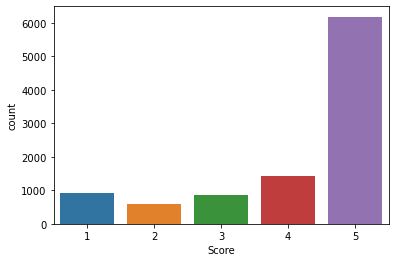

In [17]:
import seaborn as sns

sns.countplot(review_data['Score'])

## Text Preprocessing

### Removing Punctuations, Numbers, and Special Characters

In [18]:
sentence = """Hello $#! People   Good Evening 7331."""


In [19]:
import re
re.sub('[^A-Za-z]+'," ",sentence)

'Hello People Good Evening '

#### Apply it on Food review Dataset

In [20]:
def data_cleaning(text):
    clean_text = re.sub('[^A-Za-z]+'," ",text)
    return clean_text



In [21]:
review_data['Text'] = review_data['Text'].apply(lambda text : data_cleaning(text))

In [22]:
review_data['Text'] = review_data['Text'].apply(lambda text: text.lower())

### Tokenization

Converts entire sentence into individual words.

In [23]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
sentence.split()

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 "didn't",
 'feel',
 'very',
 'good.']

In [24]:
review_data

,Text,Score
0,i have bought several of the vitality canned d...,5
1,product arrived labeled as jumbo salted peanut...,1
2,this is a confection that has been around a fe...,4
3,if you are looking for the secret ingredient i...,2
4,great taffy at a great price there was a wide ...,5
...,...,...
9995,we switched from the advance similac to the or...,1
9996,like the bad reviews say the organic formula c...,5
9997,i wanted to solely breastfeed but was unable t...,5
9998,i love the fact that i can get this delieved t...,5


#### Apply it on Food review Dataset

In [25]:
review_data['token_text'] = review_data['Text'].apply(lambda text : text.split())

In [26]:
review_data

,Text,Score,token_text
0,i have bought several of the vitality canned d...,5,"[i, have, bought, several, of, the, vitality, ..."
1,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, as, jumbo, salted,..."
2,this is a confection that has been around a fe...,4,"[this, is, a, confection, that, has, been, aro..."
3,if you are looking for the secret ingredient i...,2,"[if, you, are, looking, for, the, secret, ingr..."
4,great taffy at a great price there was a wide ...,5,"[great, taffy, at, a, great, price, there, was..."
...,...,...,...
9995,we switched from the advance similac to the or...,1,"[we, switched, from, the, advance, similac, to..."
9996,like the bad reviews say the organic formula c...,5,"[like, the, bad, reviews, say, the, organic, f..."
9997,i wanted to solely breastfeed but was unable t...,5,"[i, wanted, to, solely, breastfeed, but, was, ..."
9998,i love the fact that i can get this delieved t...,5,"[i, love, the, fact, that, i, can, get, this, ..."


### Removal of Stopwords

In [27]:
## Removal of Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed
[nltk_data]     (_ssl.c:852)>


In [28]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Apply it on Food review Dataset

In [29]:
review_data['token_text'][0]

['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most']

In [30]:
def remove_stopwords(token_text):
    words=[]
    for word in token_text:
        if word not in stop_words:
            words.append(word)
            
    return words
    

In [31]:
review_data['token_text'] = review_data['token_text'].apply(lambda token_text : remove_stopwords(token_text))

In [32]:
review_data['token_text'] = review_data['token_text'].apply(lambda token_text:[word for word in token_text if word not in stop_words])



In [33]:
review_data

,Text,Score,token_text
0,i have bought several of the vitality canned d...,5,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,4,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,2,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wide ...,5,"[great, taffy, great, price, wide, assortment,..."
...,...,...,...
9995,we switched from the advance similac to the or...,1,"[switched, advance, similac, organic, product,..."
9996,like the bad reviews say the organic formula c...,5,"[like, bad, reviews, say, organic, formula, co..."
9997,i wanted to solely breastfeed but was unable t...,5,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,5,"[love, fact, get, delieved, house, delievy, ch..."


## Text Normalization

### Stemming

Stemming refers to reducing a word to its root form.
For ex. compute,computing,computed  are from same root word : comput .
So ,its better to reduce the words to their root form for uniformity


In [34]:
from nltk.stem import PorterStemmer    
ps = PorterStemmer() 



In [35]:
data = ["trouble", "troubling", "troubled", "troubles"] 
  
for word in data: 
    print(word, " : ", ps.stem(word))

trouble  :  troubl
troubling  :  troubl
troubled  :  troubl
troubles  :  troubl


In [36]:
ps.stem('considering')

'consid'

#### Apply it on Food review Dataset

In [37]:
def porter_stemming(token_text):
    
    stem_words=[]
    for word in token_text:
        stem_word = ps.stem(word)
        stem_words.append(stem_word)
        
    return stem_words
        

review_data['stem_text'] = review_data['token_text'].apply(lambda token_text : porter_stemming(token_text))

In [38]:
review_data['stem_text'] = review_data['token_text'].apply(lambda text: [ps.stem(word) for word in text]) # stemming
review_data.head()

,Text,Score,token_text,stem_text
0,i have bought several of the vitality canned d...,5,"[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product..."
1,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanut, p..."
2,this is a confection that has been around a fe...,4,"[confection, around, centuries, light, pillowy...","[confect, around, centuri, light, pillowi, cit..."
3,if you are looking for the secret ingredient i...,2,"[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo..."
4,great taffy at a great price there was a wide ...,5,"[great, taffy, great, price, wide, assortment,...","[great, taffi, great, price, wide, assort, yum..."


In [39]:
review_data

,Text,Score,token_text,stem_text
0,i have bought several of the vitality canned d...,5,"[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product..."
1,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanut, p..."
2,this is a confection that has been around a fe...,4,"[confection, around, centuries, light, pillowy...","[confect, around, centuri, light, pillowi, cit..."
3,if you are looking for the secret ingredient i...,2,"[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo..."
4,great taffy at a great price there was a wide ...,5,"[great, taffy, great, price, wide, assortment,...","[great, taffi, great, price, wide, assort, yum..."
...,...,...,...,...
9995,we switched from the advance similac to the or...,1,"[switched, advance, similac, organic, product,...","[switch, advanc, similac, organ, product, thin..."
9996,like the bad reviews say the organic formula c...,5,"[like, bad, reviews, say, organic, formula, co...","[like, bad, review, say, organ, formula, const..."
9997,i wanted to solely breastfeed but was unable t...,5,"[wanted, solely, breastfeed, unable, keep, sup...","[want, sole, breastfe, unabl, keep, supplement..."
9998,i love the fact that i can get this delieved t...,5,"[love, fact, get, delieved, house, delievy, ch...","[love, fact, get, deliev, hous, delievi, charg..."


### Lemmatization

Lemmatization also reduces words to root form but which are meaningful.
Lemma words are actual words in dictionary

In [40]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wl=WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed
[nltk_data]     (_ssl.c:852)>


In [41]:
data = ["trouble", "troubling", "troubled", "troubles"] 
  
for word in data: 
    print(word, " : ", wl.lemmatize(word,pos='v'))

trouble  :  trouble
troubling  :  trouble
troubled  :  trouble
troubles  :  trouble


#### Apply it on Food review Dataset

In [42]:
def wordnet_lemma(token_text):
    lemma_words=[]
    for word in token_text:
        lemma_word = wl.lemmatize(word,pos='v')
        lemma_words.append(lemma_word)
        
    return lemma_words

In [43]:
review_data['lemma_text'] = review_data['token_text'].apply(lambda token_text : wordnet_lemma(token_text))

In [44]:
review_data['lemma_text'] = review_data['token_text'].apply(lambda token_text : [wl.lemmatize(word,pos='v') for word in token_text])


In [45]:
review_data

,Text,Score,token_text,stem_text,lemma_text
0,i have bought several of the vitality canned d...,5,"[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product...","[buy, several, vitality, can, dog, food, produ..."
1,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanut, p...","[product, arrive, label, jumbo, salt, peanuts,..."
2,this is a confection that has been around a fe...,4,"[confection, around, centuries, light, pillowy...","[confect, around, centuri, light, pillowi, cit...","[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,2,"[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo...","[look, secret, ingredient, robitussin, believe..."
4,great taffy at a great price there was a wide ...,5,"[great, taffy, great, price, wide, assortment,...","[great, taffi, great, price, wide, assort, yum...","[great, taffy, great, price, wide, assortment,..."
...,...,...,...,...,...
9995,we switched from the advance similac to the or...,1,"[switched, advance, similac, organic, product,...","[switch, advanc, similac, organ, product, thin...","[switch, advance, similac, organic, product, t..."
9996,like the bad reviews say the organic formula c...,5,"[like, bad, reviews, say, organic, formula, co...","[like, bad, review, say, organ, formula, const...","[like, bad, review, say, organic, formula, con..."
9997,i wanted to solely breastfeed but was unable t...,5,"[wanted, solely, breastfeed, unable, keep, sup...","[want, sole, breastfe, unabl, keep, supplement...","[want, solely, breastfeed, unable, keep, suppl..."
9998,i love the fact that i can get this delieved t...,5,"[love, fact, get, delieved, house, delievy, ch...","[love, fact, get, deliev, hous, delievi, charg...","[love, fact, get, delieved, house, delievy, ch..."


### Rejoin the individual words back into Sentence

In [1]:
sentence = "I am feeling great"


In [2]:
words = sentence.split()
words

['I', 'am', 'feeling', 'great']

In [5]:
' '.join(words)

'I am feeling great'

#### Apply it on Food review Dataset

In [46]:
review_data['cleaned_text'] = review_data['stem_text'].apply(lambda text: ' '.join(text))

In [47]:
review_data

,Text,Score,token_text,stem_text,lemma_text,cleaned_text
0,i have bought several of the vitality canned d...,5,"[bought, several, vitality, canned, dog, food,...","[bought, sever, vital, can, dog, food, product...","[buy, several, vitality, can, dog, food, produ...",bought sever vital can dog food product found ...
1,product arrived labeled as jumbo salted peanut...,1,"[product, arrived, labeled, jumbo, salted, pea...","[product, arriv, label, jumbo, salt, peanut, p...","[product, arrive, label, jumbo, salt, peanuts,...",product arriv label jumbo salt peanut peanut a...
2,this is a confection that has been around a fe...,4,"[confection, around, centuries, light, pillowy...","[confect, around, centuri, light, pillowi, cit...","[confection, around, centuries, light, pillowy...",confect around centuri light pillowi citru gel...
3,if you are looking for the secret ingredient i...,2,"[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredi, robitussin, believ, fo...","[look, secret, ingredient, robitussin, believe...",look secret ingredi robitussin believ found go...
4,great taffy at a great price there was a wide ...,5,"[great, taffy, great, price, wide, assortment,...","[great, taffi, great, price, wide, assort, yum...","[great, taffy, great, price, wide, assortment,...",great taffi great price wide assort yummi taff...
...,...,...,...,...,...,...
9995,we switched from the advance similac to the or...,1,"[switched, advance, similac, organic, product,...","[switch, advanc, similac, organ, product, thin...","[switch, advance, similac, organic, product, t...",switch advanc similac organ product think woul...
9996,like the bad reviews say the organic formula c...,5,"[like, bad, reviews, say, organic, formula, co...","[like, bad, review, say, organ, formula, const...","[like, bad, review, say, organic, formula, con...",like bad review say organ formula constip daug...
9997,i wanted to solely breastfeed but was unable t...,5,"[wanted, solely, breastfeed, unable, keep, sup...","[want, sole, breastfe, unabl, keep, supplement...","[want, solely, breastfeed, unable, keep, suppl...",want sole breastfe unabl keep supplement formu...
9998,i love the fact that i can get this delieved t...,5,"[love, fact, get, delieved, house, delievy, ch...","[love, fact, get, deliev, hous, delievi, charg...","[love, fact, get, delieved, house, delievy, ch...",love fact get deliev hous delievi charg hard f...


# Text Vector Generation

## Bag of words

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
review_vectorizer = CountVectorizer()

review_features   = review_vectorizer.fit_transform(review_data['cleaned_text'])
review_features.get_shape()

(10000, 12430)

In [49]:
review_features

<10000x12430 sparse matrix of type '<class 'numpy.int64'>'
	with 310293 stored elements in Compressed Sparse Row format>

### Build Sentiment Analysis using Decision Tree

In [51]:
X = review_features    #### Features
y = review_data['Score']  #### Target

In [52]:
#Using the train_test_split to create train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

In [53]:
print('Training set :', X_train.shape)
print('Testing set :', X_test.shape)

Training set : (7500, 12430)
Testing set : (2500, 12430)


In [54]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy')

In [55]:
#Training the decision tree classifier. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

In [57]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.5836


## TF IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_review_vectorizer = TfidfVectorizer()
tfidf_review_features = tfidf_review_vectorizer.fit_transform(review_data['cleaned_text'])

In [61]:
tfidf_review_features.shape

(10000, 12430)

In [62]:
X = review_features    #### Features
y = review_data['Score']  #### Target

#Using the train_test_split to create train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

print('Training set :', X_train.shape)
print('Testing set :', X_test.shape)

#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
clf.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred =  clf.predict(X_test)

#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Training set : (7500, 12430)
Testing set : (2500, 12430)
Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.5796


In [72]:
print(review_data['Text'][9996])

like the bad reviews say the organic formula constipated our daughter however by alternating every other feeding with regular non organic formula the problem was resolved i m a believer that some organic is better than no organic we ve used this method for months and our daughter is full happy and growing well br br i would recommend this if you are looking for an organic formula with milk as the first ingredient as opposed to rice in some of the others 


In [73]:
clf.predict(X_test[-4])

array([4])